In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [80]:
# Store filepath in a variable
NBA_data = "..\Potential Data Sets\\NBA Free Throw Data.csv"
# Read our Data file with the pandas library

NBA_df = pd.read_csv(NBA_data)

In [81]:
NBA_df["Venue"].fillna('Total',inplace = True)
NBA_df.head()

,Team,Season,Venue,Wins,Loss,Win%,FT Made,FT Att,FT%,Win Rnk,Loss Rnk,Win% Rnk,FT Made Rnk,FT ATT Rnk,FT% Rnk,Total Points
0,Atlanta Hawks,2012-13,Home,25,16,0.610,595,856,0.695,15,15,15,27,24,28,4075
1,Boston Celtics,2012-13,Home,27,13,0.675,675,889,0.759,13,12,13,20,21,15,3940
2,Brooklyn Nets,2012-13,Home,26,15,0.634,724,1003,0.722,14,14,14,11,10,25,4001
3,Charlotte Bobcats,2012-13,Home,15,26,0.366,823,1076,0.765,28,28,28,3,6,11,3955
4,Chicago Bulls,2012-13,Home,24,17,0.585,685,892,0.768,16,16,16,17,20,10,3809


In [82]:
NBA_df["Team"].loc[NBA_df["Team"] == "Los Angeles Clippers"]="LA Clippers"
NBA_df["Team"].loc[NBA_df["Team"] == "Charlotte Bobcats"] = "Charlotte Hornets"
NBA_df["Team"].loc[NBA_df["Team"] == "New Orleans Hornets"] = "New Orleans Pelicans"

## Difference between Home and Away free throw attempts total.


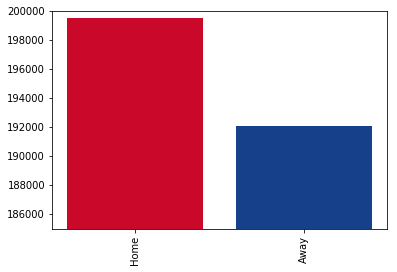

In [135]:
away=NBA_df.loc[NBA_df["Venue"]== "Road"]
home=NBA_df.loc[NBA_df["Venue"] == "Home"]
total=NBA_df.loc[NBA_df["Venue"] == "Total"]

hometotal= home["FT Att"].sum()
awaytotal= away["FT Att"].sum()


plt.bar("Home",hometotal,label="Home Attempts", color="#C9082A")
plt.bar("Away",awaytotal,label="Away Attempts",  color="#17408B")
plt.ylim(185000, 200000)
plt.xticks(rotation=90)
plt.show()

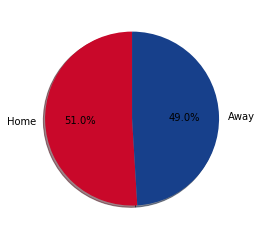

In [144]:
pie_data=[hometotal,awaytotal]

colors = ["#C9082A","#17408B"]
label =["Home","Away"]

plt.pie(pie_data, colors=colors, labels=label, shadow=True, autopct="%1.1f%%", startangle=90)#, color="#C9082A")
#plt.pie(awaytotal, color="#17408B")

plt.show()

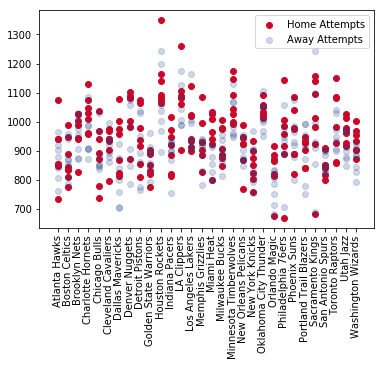

In [141]:

## Home and away free throw attempts by team. Scatter plot


plt.scatter(home["Team"],home["FT Att"],label="Home Attempts", color="#C9082A")
plt.scatter(away["Team"],away["FT Att"],label="Away Attempts",alpha=.2,  color="#17408B")
plt.legend()
plt.xticks(rotation=90)
plt.show()

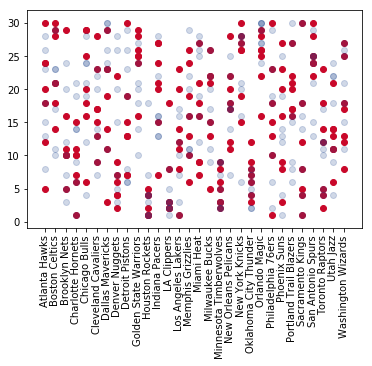

In [21]:
## Home vs away scatter plot by team rank

plt.scatter(home["Team"],home["FT ATT Rnk"],label="Home Attempts", color="#C9082A")
plt.scatter(away["Team"],away["FT ATT Rnk"],label="Away Attempts",alpha=.2,  color="#17408B")
plt.xticks(rotation=90)
plt.show()

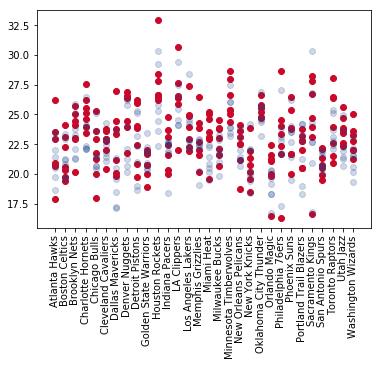

In [92]:
## average free throw attempts by game

plt.scatter(home["Team"],(home["FT Att"]/(home["Wins"]+home["Loss"])),label="Home Attempts", color="#C9082A")
plt.scatter(away["Team"],(away["FT Att"]/(away["Wins"]+away["Loss"])),label="Away Attempts",alpha=.2,  color="#17408B")
plt.xticks(rotation=90)
plt.show()

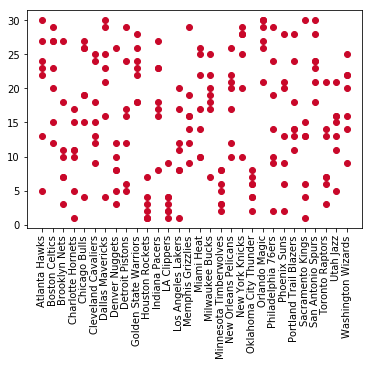

In [22]:
plt.scatter(total["Team"],total["FT ATT Rnk"],label="Attempt Rank", color="#C9082A")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.scatter(total["Team"],total["FT Att"],label="Total Attempts", color="#C9082A")
plt.legend()
plt.xticks(rotation=90)
plt.show()

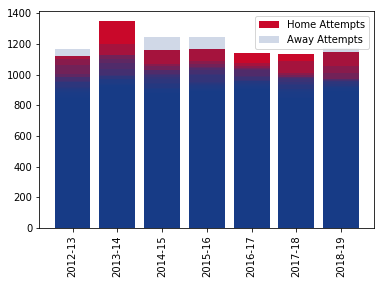

In [90]:
## tried free throw attempts by season as a bar chart, did not work, just overlayed.

plt.bar(home["Season"],home["FT Att"],label="Home Attempts", color="#C9082A")
plt.bar(away["Season"],away["FT Att"],label="Away Attempts",alpha=.2,  color="#17408B")
plt.legend()
plt.xticks(rotation=90)
plt.show()

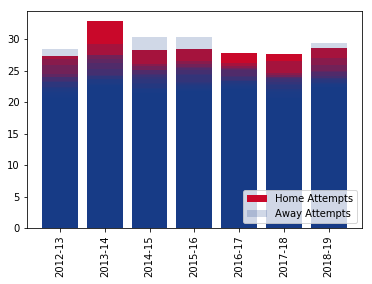

In [121]:
#Bar chart overlayed.

plt.bar(home["Season"],(home["FT Att"]/(home["Wins"]+home["Loss"])),label="Home Attempts", color="#C9082A")
plt.bar(away["Season"],(away["FT Att"]/(away["Wins"]+away["Loss"])),label="Away Attempts",alpha=.2,  color="#17408B")
plt.legend(loc="lower right")
plt.xticks(rotation=90)
plt.show()

In [63]:

team_home= home.groupby(["Team"])
team_away= away.groupby(["Team"])
team_total= total.groupby(["Team"])


In [115]:
home_AP = team_home["Total Points"].mean()
home_ftm = team_home["FT Made"].mean()
home_ft_to_points = team_home["FT Made"].mean()/team_home["Total Points"].mean()

away_AP = team_away["Total Points"].mean()
away_ftm = team_away["FT Made"].mean()
away_ft_to_points = team_away["FT Made"].mean()/team_away["Total Points"].mean()

total_AP = team_total["Total Points"].mean()
total_ftm = team_total["FT Made"].mean()
total_ft_to_points = team_total["FT Made"].mean()/team_total["Total Points"].mean()
home_AP.head()


Team
Atlanta Hawks        4279.000000
Boston Celtics       4254.571429
Brooklyn Nets        4202.000000
Charlotte Hornets    4219.000000
Chicago Bulls        4084.142857
Name: Total Points, dtype: float64

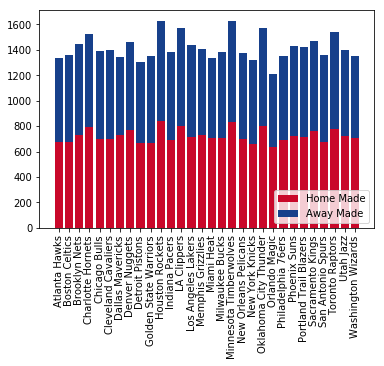

In [104]:

plt.bar(home_ftm.index,home_ftm ,label="Home Made", color="#C9082A")
plt.bar(away_ftm.index,away_ftm ,label="Away Made", bottom = home_ftm, color="#17408B")
plt.legend(loc="lower right")
plt.xticks(rotation=90)
plt.show()

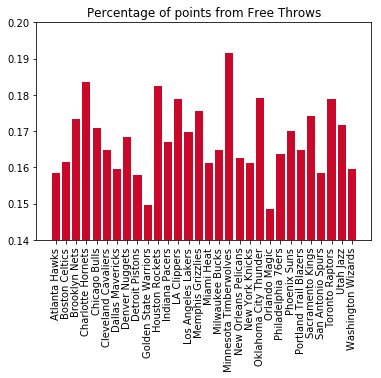

In [113]:
# Percentage of a teams overall points from Free Throws
plt.bar(total_ft_to_points.index,total_ft_to_points, color="#C9082A")
plt.ylim(.14, .2)
plt.title("Percentage of points from Free Throws")
plt.xticks(rotation=90)

plt.show()

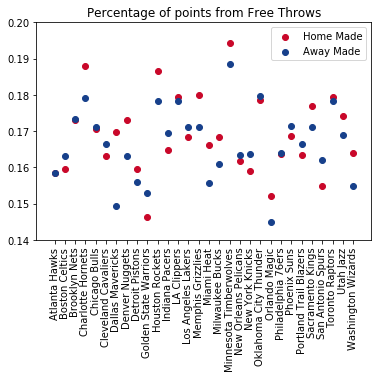

In [123]:
plt.scatter(home_ft_to_points.index,home_ft_to_points ,label="Home Made", color="#C9082A")
plt.scatter(away_ft_to_points.index,away_ft_to_points ,label="Away Made",  color="#17408B")
plt.ylim(.14, .2)
plt.legend(loc="upper right")
plt.title("Percentage of points from Free Throws")
plt.xticks(rotation=90)

plt.show()

In [55]:
HomeAway = NBA_df.groupby(["Venue","Season"])

In [60]:
HomeAway['FT Att'].sum()

Venue  Season 
Home   2012-13    27893
       2013-14    29629
       2014-15    28582
       2015-16    29410
       2016-17    29055
       2017-18    26989
       2018-19    27974
Road   2012-13    26640
       2013-14    28400
       2014-15    27616
       2015-16    28059
       2016-17    27800
       2017-18    26336
       2018-19    27192
Name: FT Att, dtype: int64